http://localhost:8888/?token=c8d29b33a255d4faad01554521b43c077589052c3f11dc9b

From: https://github.com/rbaravalle/efros

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from time import time

Starting...
Process  3  /  256 . Time:  0.00362682342529  seconds
Process  4  /  256 . Time:  0.749888896942  seconds
Process  5  /  256 . Time:  1.73292303085  seconds
Process  6  /  256 . Time:  2.73531794548  seconds
Process  7  /  256 . Time:  3.88206291199  seconds
Process  8  /  256 . Time:  5.14509296417  seconds
Process  9  /  256 . Time:  6.72523283958  seconds
Process  10  /  256 . Time:  8.27573299408  seconds
Process  11  /  256 . Time:  9.87502598763  seconds
Process  12  /  256 . Time:  11.4517319202  seconds
Process  13  /  256 . Time:  13.4971449375  seconds
Process  14  /  256 . Time:  15.7139089108  seconds
Process  15  /  256 . Time:  18.0959668159  seconds
Process  16  /  256 . Time:  20.2254559994  seconds
Process  17  /  256 . Time:  22.5507190228  seconds
Process  18  /  256 . Time:  24.9480960369  seconds
Process  19  /  256 . Time:  27.5765299797  seconds
Process  20  /  256 . Time:  30.6056928635  seconds
Process  21  /  256 . Time:  33.8451349735  seconds
Pro

Process  160  /  256 . Time:  1884.43133783  seconds
Process  161  /  256 . Time:  1908.49488187  seconds
Process  162  /  256 . Time:  1931.50931001  seconds
Process  163  /  256 . Time:  1954.87253284  seconds
Process  164  /  256 . Time:  1979.51462293  seconds
Process  165  /  256 . Time:  2003.8790319  seconds
Process  166  /  256 . Time:  2026.94274688  seconds
Process  167  /  256 . Time:  2050.518085  seconds
Process  168  /  256 . Time:  2073.14096785  seconds
Process  169  /  256 . Time:  2096.54552603  seconds
Process  170  /  256 . Time:  2120.55212998  seconds
Process  171  /  256 . Time:  2145.17351699  seconds
Process  172  /  256 . Time:  2168.90604591  seconds
Process  173  /  256 . Time:  2192.746387  seconds
Process  174  /  256 . Time:  2216.06459999  seconds
Process  175  /  256 . Time:  2240.54488301  seconds
Process  176  /  256 . Time:  2264.88776803  seconds
Process  177  /  256 . Time:  2296.38772893  seconds
Process  178  /  256 . Time:  2327.41374183  second

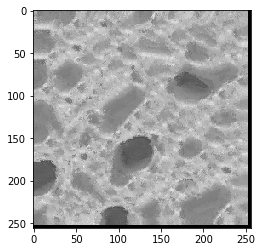

In [6]:
output_file = "out2.png"

# Efros and Leung 1999 implementation

def process_pixel(x, y, img_data, new_img_data, mask, kernel_size):

    x0 = max(0, x - kernel_size)
    y0 = max(0, y - kernel_size) 
    x1 = min(new_img_data.shape[0] - 1, x + kernel_size)
    y1 = min(new_img_data.shape[1] - 1, y + kernel_size)

    neigh_window = new_img_data[x0 : x1, y0 : y1]

    mask_window = mask[x0 : x1, y0 : y1]
    len_mask = float(len(mask_window==True))

    xs, ys = neigh_window.shape
    img_xsize, img_ysize = img_data.shape

    cx = int(np.floor(xs/2))
    cy = int(np.floor(ys/2))

    candidates = []
    dists = []

    for i in range(xs, img_xsize - xs):
        for j in range(ys, img_ysize - ys):
            if(randint(0,2) != 0): continue
            sub_window = img_data[i : i+xs, j : j+ys]

            # distance
            s = (sub_window - neigh_window)

            summ = s*s*mask_window

            d = np.sum(summ) / len_mask

            candidates.append(sub_window[cx, cy])
            dists.append(d)

    mask = dists - np.min(dists) < 0.2

    candidates = np.extract(mask, candidates)   

    # pick random among candidates
    if len(candidates) < 1:
        return 0.0
    else:
        if len(candidates) != 1:
            r = randint(0, len(candidates) - 1)
        else:
            r = 0

    return candidates[r]

    

def efros(img_data, new_size_x, new_size_y, kernel_size, t):

    patch_size_x, patch_size_y = img.size 
    size_seed_x = size_seed_y = 3

    seed_x = randint(0, size_seed_x)
    seed_y = randint(0, size_seed_y)

    # take 3x3 start image (seed) in the original image
    seed_data = img_data[seed_x : seed_x + size_seed_x, seed_y : seed_y + size_seed_y]

    new_image_data = np.zeros((new_size_x, new_size_y))
    mask = np.ones((new_size_x, new_size_y)) == False

    mask[0: size_seed_x, 0: size_seed_y] = True

    new_image_data[0: size_seed_x, 0: size_seed_y] = seed_data


    # TO DO: non-square images

    it = 0
    for i in range(size_seed_x, new_size_x ):
        print "Process ", i, " / ", new_size_x, ". Time: ", time() - t, " seconds"

        last_y = size_seed_x + it
        # xxxxxxx
        for j in range(0, last_y + 1):

            v = process_pixel(i, j, img_data, new_image_data, mask, kernel_size)

            new_image_data[i, j] = v
            mask[i, j] = True
            

        # x
        # x
        # x
        for x in range(0, size_seed_y + it + 1):

            v = process_pixel(x, last_y, img_data, new_image_data, mask, kernel_size)

            new_image_data[x, last_y] = v
            mask[x, last_y] = True

        it += 1


        if(it % 10 == 0) :
            img_new = Image.fromarray(new_image_data)
            img_new.convert("RGB").save(output_file)


    return img_new

# main program

filename = "img2.png"
new_size_x = 256
new_size_y = 256
kernel_size = 21

img = Image.open(filename)
img_data = img.convert("L")
img_data = np.array(img_data)

print "Starting..."

t = time()

img_new = efros(img_data, new_size_x, new_size_y, kernel_size/2, t)

print "Total Time: ", time() - t, " seconds"

print "Finished!"

plt.imshow(img_new, cmap = "Greys")
plt.show()


img_new.convert("RGB").save(output_file)

In [3]:
pwd

u'/Users/kersten'

In [4]:
!pwd

/Users/kersten


In [5]:
!ls

Applications                Movies alias
Business alias              Music
Desktop                     Pictures
Documents                   Programming
Downloads                   Public
Dropbox                     Research alias
Dropbox (Deva)              Sites
Dropbox (Personal)          anaconda
EfrosTextureSynthesis.ipynb data
Google Drive                img.png
Library                     img2.png.html
Movies
